In [1]:
# author: Fahim Tajwar

from project_code.label_loader import *
from project_code.image_loader import *
from project_code.util import *
from project_code.models import *
from project_code.model_trainer import *
from project_code.dataset import *

In [2]:
file_name_1 = '/Users/fahimtajwar/Academics/cs231/labels_cells_only.xlsx'
file_name_2 = '/Users/fahimtajwar/Academics/cs231/classes_800.xlsx'
file_names = [file_name_1, file_name_2]

label_reader = Label_Reader(file_names)
weight_vector = label_reader.get_weight_vector()
print(label_reader.get_all_labels())
print(label_reader.get_label_to_label_id_map())
print(weight_vector)

{'cell dies', 'grows sparse', 'grows dense'}
{'cell dies': 0, 'grows sparse': 1, 'grows dense': 2}
tensor([0.0260, 0.0097, 0.0294])


In [3]:
prefix = "/Users/fahimtajwar/Academics/cs231/project_data_well_2/well2_data/well"
suffix = "_well.png"

all_well_ids = label_reader.get_all_well_ids()
si = Single_Image_Loader(5, all_well_ids, prefix, suffix)
tensor = si.get_image_tensor()
well_id_to_image_id_map = si.get_well_to_image_id_map()
print(tensor.shape)
print(well_id_to_image_id_map)

torch.Size([351, 3, 224, 224])
{1004: 0, 1006: 1, 1015: 2, 1016: 3, 1018: 4, 1019: 5, 1023: 6, 1027: 7, 1036: 8, 1037: 9, 1046: 10, 1055: 11, 1060: 12, 1062: 13, 1063: 14, 1064: 15, 1078: 16, 1086: 17, 1091: 18, 1098: 19, 1100: 20, 1111: 21, 1122: 22, 1125: 23, 1130: 24, 1134: 25, 1141: 26, 1142: 27, 1146: 28, 1153: 29, 1171: 30, 1175: 31, 1176: 32, 1187: 33, 1194: 34, 1233: 35, 1242: 36, 1254: 37, 1265: 38, 1303: 39, 1324: 40, 1327: 41, 1337: 42, 1389: 43, 1416: 44, 1432: 45, 1457: 46, 1460: 47, 1476: 48, 1480: 49, 1516: 50, 1520: 51, 1524: 52, 1569: 53, 1591: 54, 1600: 55, 1607: 56, 1608: 57, 1611: 58, 1614: 59, 1622: 60, 1644: 61, 1646: 62, 1667: 63, 1672: 64, 1679: 65, 1685: 66, 1689: 67, 1693: 68, 1714: 69, 1719: 70, 1733: 71, 1736: 72, 1739: 73, 1754: 74, 1770: 75, 1771: 76, 1772: 77, 1775: 78, 1779: 79, 1784: 80, 1785: 81, 1786: 82, 1791: 83, 1794: 84, 1801: 85, 1804: 86, 1806: 87, 1807: 88, 1811: 89, 1812: 90, 1813: 91, 1815: 92, 1819: 93, 1824: 94, 1825: 95, 1828: 96, 1829: 97

In [4]:
input_size = 3 * 224 * 224
num_classes = 3

label_to_label_id = label_reader.label_to_label_id
label_id_to_label_map = label_reader.get_label_id_to_label_map()
#print(label_id_to_label_map)

Y_label = label_reader.get_label_map()
for key in Y_label:
    Y_label[key] = label_to_label_id[Y_label[key]]

#print(Y_label)

label_id_train, label_id_val, label_id_test = get_dataset_split(Y_label)
print(len(label_id_train))
print(label_id_train)
print(len(label_id_val))
print(len(label_id_train))

280
[1772 1813 1019  518 2684 2397  702 2134   62  499 2215 1838  325   96
  455  326 1060  677  542 2414  111 1859 2193 2101 1992  329 1018 1833
 2389  683  412  384  201  317 1111  418 1476  738 1983 1303 1779  134
 2991  286 1153  128  307 2388  709   17   75 2299  202  434  667 1233
 1849 1122 2017 1714  389 2857 2199  451  206 2122 1893 2853 2502 1063
 1900  269 1931  321 1327 1091 2432 1880  242 2387  559 1125 2096 1943
  360  608 1242 2484 2227 1265 1979  517 1945 2337  569 1962 2253 1876
 2291 1667 1824 2543   98  136  183 1524 1754   29  548 1037 2194 1324
 2662  450  399 1516 2360  374  197 2285 1918  257 2986 1194 2137 1023
 2751 2018 1853  587 1689 2634 1608  169 2124 1939 2866 1171 2111 2406
 1967 1770 2693 1646 2091 2082 2114 1811 2179 2001 1672 1828 1857 2955
 1254   54 1825  347 1866 2666 2438 1785 2099 1819  753 1027 1804 1130
  750 2579  525 1078 1004  250 1432 1062 2351 1015 1791 1457 1806 1460
 2361 1100 2346 2891 1879  255 1891 1187  100 1389 1993 2228 2942 1794
 2

In [5]:
training_set = Augmented_Dataset(tensor, label_id_train, Y_label, well_id_to_image_id_map, 
                                 final_transformation_choice)
validation_set = Augmented_Dataset(tensor, label_id_val, Y_label, well_id_to_image_id_map, transform_normalization)
test_set = Augmented_Dataset(tensor, label_id_test, Y_label, well_id_to_image_id_map, transform_normalization)

In [6]:
training_batch_size = 320
validation_batch_size = 1
test_batch_size = 1
learning_rate = 0.001

validation_loader = torch.utils.data.DataLoader(dataset = validation_set, 
                                          batch_size = validation_batch_size, 
                                          shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = test_batch_size, 
                                          shuffle = False)

In [7]:
conv_net_1 = Our2DConvNetDesign1(num_classes = 3)
model_1 = Model(conv_net_1, training_set, training_batch_size, learning_rate, label_id_to_label_map, 
              weight = weight_vector, imbalanced_class = True, num_epochs = 30, verbose = True)

Epoch: [1/30], Loss: 1.1165
Epoch: [2/30], Loss: 1.1072
Epoch: [3/30], Loss: 1.0978
Epoch: [4/30], Loss: 1.0725
Epoch: [5/30], Loss: 1.0604
Epoch: [6/30], Loss: 1.0615
Epoch: [7/30], Loss: 1.0585
Epoch: [8/30], Loss: 1.0474
Epoch: [9/30], Loss: 1.0561
Epoch: [10/30], Loss: 1.0549
Epoch: [11/30], Loss: 1.0254
Epoch: [12/30], Loss: 1.0446
Epoch: [13/30], Loss: 1.0373
Epoch: [14/30], Loss: 1.0161
Epoch: [15/30], Loss: 1.0295
Epoch: [16/30], Loss: 1.0103
Epoch: [17/30], Loss: 1.0221
Epoch: [18/30], Loss: 1.0121
Epoch: [19/30], Loss: 1.0079
Epoch: [20/30], Loss: 1.0027
Epoch: [21/30], Loss: 0.9888
Epoch: [22/30], Loss: 0.9853
Epoch: [23/30], Loss: 0.9866
Epoch: [24/30], Loss: 0.9838
Epoch: [25/30], Loss: 0.9865
Epoch: [26/30], Loss: 0.9753
Epoch: [27/30], Loss: 0.9578
Epoch: [28/30], Loss: 0.9785
Epoch: [29/30], Loss: 0.9803
Epoch: [30/30], Loss: 0.9694
Training done!


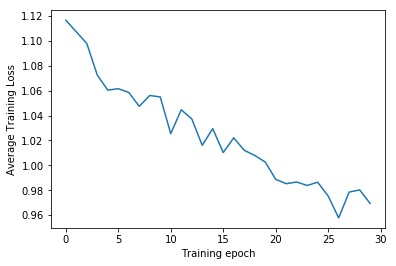

accuracy : 48.000000

Frequency per class:  {'grows sparse': 165, 'grows dense': 55, 'cell dies': 60}


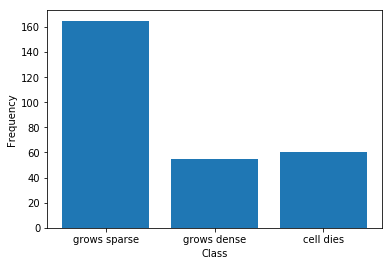

Number of datapoints we got correct per class {'grows sparse': 61, 'grows dense': 41, 'cell dies': 33}
Accuracy per class {'grows sparse': 0.3696969696969697, 'grows dense': 0.7454545454545455, 'cell dies': 0.55}


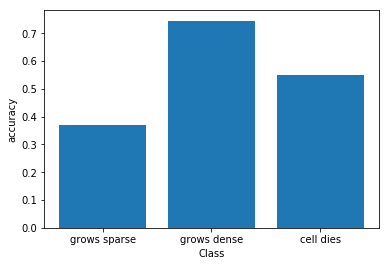

0.15157575757575759

In [8]:
model_1.train()

accuracy : 60.000000

Frequency per class:  {'grows sparse': 19, 'cell dies': 8, 'grows dense': 8}


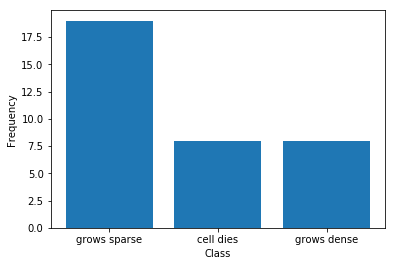

Number of datapoints we got correct per class {'grows sparse': 8, 'cell dies': 6, 'grows dense': 7}
Accuracy per class {'grows sparse': 0.42105263157894735, 'cell dies': 0.75, 'grows dense': 0.875}


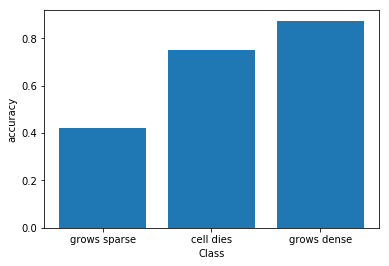

0.2763157894736842

In [9]:
model_1.test(validation_loader)

accuracy : 48.000000

Frequency per class:  {'grows dense': 6, 'grows sparse': 24, 'cell dies': 5}


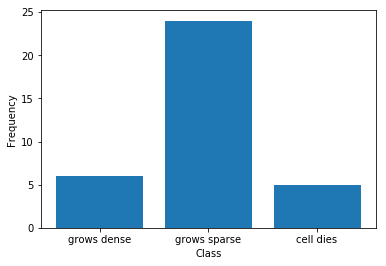

Number of datapoints we got correct per class {'grows dense': 3, 'grows sparse': 9, 'cell dies': 5}
Accuracy per class {'grows dense': 0.5, 'grows sparse': 0.375, 'cell dies': 1.0}


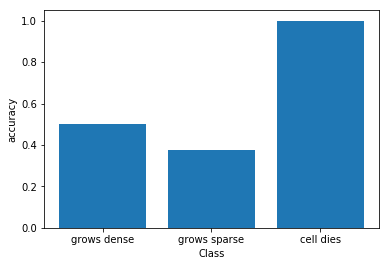

0.1875

In [10]:
model_1.test(test_loader)